# Plotting

We want to plot the statistics for pre-processing and post-processing.

In [1]:
# from GWMT import *
# import readMergeTree as rmt
# import os
# import networkx as nx
# from matplotlib import pyplot as plt

## Section 1. Plots for pre-processing settings

### Step 0. load the raw data for plotting statistics for pre-processing settings

In [2]:
# datasets = ["CPPin20230801_0percent", "CPPin20230802_0percent", "CPPin20230803_0percent",
#             "CPPin20230804_0percent", "CPPin20230805_0percent", "CPPin20230806_0percent",
#             "CPPin20230807_0percent", "CPPin20230808_0percent", "CPPin20230809_0percent",
#             "CPPin20230810_0percent", "CPPin20230811_0percent", "CPPin20230812_0percent",
#             "CPPin20230813_0percent", "CPPin20230814_0percent"]

In [3]:
# # dataset choices: ["CPPin202308*", "*juelich"]\

# # CPPin202308*: typical ocean data
# datasets = ["CPPin20230801_0percent", "CPPin20230802_0percent", "CPPin20230803_0percent",]

# # *juelich: typical land data
# # dataset = "20190512_juelich"

# region_list = []
# value_list = []

# for dataset in datasets:
#     dataset_path = os.path.join("data", dataset)

#     for froot, di, files in os.walk(dataset_path):

#         def key(s):
#             try:
#                 int(s)
#                 return int(s)
#             except ValueError:
#                 return len(files) + 1

#         def isSegmentation(s: str):
#             return "segmentation" in s

#         def endsWithTxt(s: str):
#             return s.endswith("txt")

#         def endsWithNpy(s: str):
#             return s.endswith("npy")

#         txt_files = list(filter(endsWithTxt, files))
#         txt_files.sort(key=lambda x: key(x.split(".")[0].split("_")[-1]))

#         for file in txt_files:
#             regions, values = rmt.get_regions(os.path.join(dataset_path, file))
#             region_list.extend(regions)
#             value_list.extend(values)

#     assert (len(region_list) == len(value_list))

### Plot 1 & 2. Number of clusters & area coverage percentage w.r.t. cluster sizes

Plot 1:
* x axis: cluster size
* y axis: number of clusters (from all time steps)
* curves: different superlevel set thresholds

Plot 2:
* x axis: cluster size
* y axis: area coverage percentage (from all time steps)
* curves: different superlevel set thresholds

In [4]:
# from scipy.ndimage import label as lbl
# import matplotlib as mpl
# from matplotlib.colors import LinearSegmentedColormap, ListedColormap

# def is_sorted(lst):
#     return all(lst[i] <= lst[i + 1] for i in range(len(lst) - 1))

# def categorical_colormap(values, zero_background=True):
#     pastel = mpl.colormaps['Pastel1']
#     color_choices = pastel(np.linspace(0, 1, 9))
# #     color_choices = ["darkorange", "gold", "lawngreen", "lightseagreen"]

#     n_choices = len(color_choices)
#     N = len(values)
    
#     colors = []
#     for i in range(N + 1):
#         if i == 0 and zero_background:
#             colors.append("black")
#         else:
#             colors.append(color_choices[i % n_choices])
#     cmap = ListedColormap(colors)
#     return cmap

# # input: a 2D matrix for the scalar field values
# # output: the segment sizes
# def cluster_sizes(mat, thres):
#     structure = np.array([[1, 1, 1],
#                           [1, 1, 1],
#                           [1, 1, 1]])
    
#     values = copy.deepcopy(mat)
#     values[mat < thres] = 0
#     values[mat >= thres] = 1
    
#     # segments: 2D matrix of segmentations of connected components 
#     # n_features: the number of different segmentations
#     segments, n_features = lbl(values, structure)
    
#     # next, we count the number of elements for each segment
#     segment_vals, segment_sizes = np.unique(segments, return_counts=True)
#     if len(segment_sizes) <= 0:
#         raise ValueError("Invalid field. Check the value matrices.")
#     assert segment_vals[0] == 0
#     if len(segment_sizes) == 1:
#         raise ValueError("Error: All pixels are background.")
        
#     # saving the segmentation for debug purpose
# #     np.savetxt("segments_debug/segments_debug.txt", segments)
        
#     return segment_sizes[1:]

# # input: segment sizes
# # output: segment_size_unique, segment_size_counts (accumulated)
# def count_segment_size(segment_sizes, normalized=True):
#     total_count = len(segment_sizes) if normalized else 1
#     unique, counts = np.unique(segment_sizes, return_counts=True)
#     assert is_sorted(unique)
#     sum_counts = np.cumsum(counts)
    
#     return unique, sum_counts / total_count

# # input: segment sizes
# # output: segment_size_unique, segment_coverage (accumulated)
# def count_segment_coverage(segment_sizes, full_size):
#     unique, counts = np.unique(segment_sizes, return_counts=True)
#     assert is_sorted(unique)
    
#     unique_coverage = [i * j for i, j in zip(unique, counts)]
#     sum_counts = np.cumsum(unique_coverage)
    
#     return unique, sum_counts / full_size

In [5]:
# threshold_choices = list(np.arange(0.5, 5.1, 0.5))

# segment_sizes_thres = []
# for thres in threshold_choices:
#     segment_sizes_all_times = []
#     for t in range(len(value_list)):
#         segment_sizes = cluster_sizes(value_list[t], thres)
#         segment_sizes_all_times.extend(segment_sizes)
#     segment_sizes_thres.append(segment_sizes_all_times)

In [6]:
# # Plot 1
# font = {
#     "family": "sans-serif",
#     "weight": "normal",
#     "size": 24
# }

# smallfont = {
#     "family": "sans-serif",
#     "weight": "normal",
#     "size": 20
# }

# plt.figure(figsize=(8, 6))
# for i, thres in enumerate(threshold_choices):
#     segment_sizes, segment_accum_counts = count_segment_size(segment_sizes_thres[i], normalized=True)
#     print("Max component size: ", np.max(segment_sizes))
#     plt.plot(segment_sizes, segment_accum_counts, label=str(thres))

# # Full view
# plt.xscale("log")
# plt.xlim([1, 1e3])
# plt.ylim([0.27, 1.01])
# plt.legend(prop=font, ncol=2)

# # Zoom-in
# # plt.xlim([8, 16])
# # plt.ylim([0.7, 0.85])
# # plt.axvline(x=10, color='black', linestyle="--")
# # plt.legend(prop=smallfont, ncol=2)

# plt.xticks(font=font)
# plt.yticks(font=font)
# plt.xlabel("Cloud area size (pixels)", font=font)
# plt.ylabel("Accumulated proportion of \ncloud number density", font=smallfont)

# plt.show()

In [7]:
# # Plot 2

# plt.figure(figsize=(8, 6))
# for i, thres in enumerate(threshold_choices):
#     sum_segment_area = np.sum(segment_sizes_thres[i])
#     segment_sizes, segment_accum_coverage = count_segment_coverage(segment_sizes_thres[i], sum_segment_area)
#     for check in range(len(segment_sizes)):
#         if segment_sizes[check] >= 1000:
#             print(thres, segment_sizes[check], segment_accum_coverage[check])
#             break
        
#     plt.plot(segment_sizes, segment_accum_coverage, label=str(thres))

# # Full view
# plt.xscale("log")
# plt.ylim([0.0, 1.01])
# plt.legend(prop=font, ncol=2)

# # Zoom-in
# # plt.xlim([8, 16])
# # plt.ylim([0.0, 0.10])
# # plt.axvline(x=10, color='black', linestyle="--")
# # plt.legend(prop=smallfont, ncol=2)


# plt.xticks(font=font)
# plt.yticks(font=font)
# plt.xlabel("Cloud area size (pixels)", font=font)
# plt.ylabel("Accumulated proportion of \ncloud area size", font=smallfont)
# plt.show()

## Section 2. Plots for tracking results

### Generating tracking results

We compute the matching based on matching scores.
We move the step to here to unify all kinds of output from three different approaches (ours, tobac, PyFLEXTRKR)

In [8]:
# dates = ["20230801", "20230802", "20230803", "20230804", "20230805", "20230806", "20230807",
#          "20230808", "20230809", "20230810", "20230811", "20230812", "20230813", "20230814",]
# dates = ["20230801"]
dates = ["20230801", "20230802", "20230803", "20230804", "20230805", "20230806" , "20230807", "20230808"]

In [9]:
import pickle
from os.path import join as pjoin
import os

techniques = ["pFGW-system", "LWM", "MT-Wasserstein"]
track_information = {}
dataset_strs = {}
alpha=0.4
nDates = len(dates)

for date in dates:
    for technique in techniques:
        track_info_dir = "./track-info/"

        # name-persSimp-alpha
        dataset=("CPPin20230801_-0percent-" + (str(alpha) if 'pFGW' in technique else "0")).replace("20230801", date)
        superlevel_thres = 2.0
        dataset_str = "{}-thres-{}".format(dataset, str(round(superlevel_thres, 1)))
        print("Dataset:", dataset)

        dataset_str = pjoin(technique, dataset_str)
        if technique not in dataset_strs:
            dataset_strs[technique] = [dataset_str]
        else:
            dataset_strs[technique].append(dataset_str)

        track_info_dir = pjoin(track_info_dir, dataset_str)

        centroids = clustered_sfs = matching_scores = None
        with open(pjoin(track_info_dir, "clustered_sf.pkl"), "rb") as infile:
            clustered_sfs = pickle.load(infile)
            infile.close()

        with open(pjoin(track_info_dir, "centroids.pkl"), "rb") as infile:
            centroids = pickle.load(infile)
            infile.close()

        with open(pjoin(track_info_dir, "matching_scores.pkl"), "rb") as infile:
            matching_scores = pickle.load(infile)
            infile.close()

        if technique not in track_information:
            track_information[technique] = [[clustered_sfs, centroids, matching_scores]]
        else:
            track_information[technique].append([clustered_sfs, centroids, matching_scores])

Dataset: CPPin20230801_-0percent-0.4
Dataset: CPPin20230801_-0percent-0
Dataset: CPPin20230801_-0percent-0
Dataset: CPPin20230802_-0percent-0.4
Dataset: CPPin20230802_-0percent-0
Dataset: CPPin20230802_-0percent-0
Dataset: CPPin20230803_-0percent-0.4
Dataset: CPPin20230803_-0percent-0
Dataset: CPPin20230803_-0percent-0
Dataset: CPPin20230804_-0percent-0.4
Dataset: CPPin20230804_-0percent-0
Dataset: CPPin20230804_-0percent-0
Dataset: CPPin20230805_-0percent-0.4
Dataset: CPPin20230805_-0percent-0
Dataset: CPPin20230805_-0percent-0
Dataset: CPPin20230806_-0percent-0.4
Dataset: CPPin20230806_-0percent-0
Dataset: CPPin20230806_-0percent-0
Dataset: CPPin20230807_-0percent-0.4
Dataset: CPPin20230807_-0percent-0
Dataset: CPPin20230807_-0percent-0
Dataset: CPPin20230808_-0percent-0.4
Dataset: CPPin20230808_-0percent-0
Dataset: CPPin20230808_-0percent-0


In [10]:
from postprocess import compute_one2one_matching, output_trajectories
import copy

for iDate in range(nDates):
    for technique in techniques:
        clustered_sfs = track_information[technique][iDate][0]
        matching_scores = track_information[technique][iDate][2]
#         if "pFGW" in technique:
        cloud_id_mapping, durations = compute_one2one_matching(matching_scores, "area-priority", clustered_sfs, 1/10)
#         else:
#             cloud_id_mapping, durations = compute_one2one_matching(matching_scores, "max-max")
        track_information[technique][iDate].extend([cloud_id_mapping, durations])

Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large cloud matchings.
Finished computing area sorting.
Using area-priority strategy. The oc_threshold should be considerably high to avoid arbitrary large 

In [53]:
# # This is to output the trajectory. It is not a mandatory process.

for iDate in range(nDates):
    for technique in techniques:
        if technique == "pFGW-system":
            continue
        if iDate != 0:
            continue
        print(dates[iDate], technique)
        dataset_str = dataset_strs[technique][iDate]
        clustered_sfs, centroids, _, cloud_id_mapping, _ = track_information[technique][iDate]
        output_trajectories(dataset_str, centroids, copy.deepcopy(clustered_sfs), cloud_id_mapping)

20230801 pFGW-system
save trajectory files done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save feature map done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save trajectory files done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save feature map done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save trajectory files done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save feature map done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save trajectory files done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save feature map done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save trajectory files done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save feature map done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save trajectory files done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save feature map done for pFGW-system\CPPin20230801_-0percent-0.4-thres-2.0
save trajectory files done for pFGW-s

save feature map done for LWM\CPPin20230801_-0percent-0-thres-2.0
20230801 MT-Wasserstein
save trajectory files done for MT-Wasserstein\CPPin20230801_-0percent-0-thres-2.0
save feature map done for MT-Wasserstein\CPPin20230801_-0percent-0-thres-2.0
save trajectory files done for MT-Wasserstein\CPPin20230801_-0percent-0-thres-2.0
save feature map done for MT-Wasserstein\CPPin20230801_-0percent-0-thres-2.0
save trajectory files done for MT-Wasserstein\CPPin20230801_-0percent-0-thres-2.0
save feature map done for MT-Wasserstein\CPPin20230801_-0percent-0-thres-2.0
save trajectory files done for MT-Wasserstein\CPPin20230801_-0percent-0-thres-2.0
save feature map done for MT-Wasserstein\CPPin20230801_-0percent-0-thres-2.0
save trajectory files done for MT-Wasserstein\CPPin20230801_-0percent-0-thres-2.0
save feature map done for MT-Wasserstein\CPPin20230801_-0percent-0-thres-2.0
save trajectory files done for MT-Wasserstein\CPPin20230801_-0percent-0-thres-2.0
save feature map done for MT-Wass

In [12]:
output_merge_split = False

In [13]:
from postprocess import supplementary_trajectories
if output_merge_split:
    # the oc_thres is the threshold for the probability to be considered IF it is larger than (thres * row_probability) 
    oc_thres = 3 / 10
    for iDate in range(nDates):
        for technique in techniques:
            dataset_str = dataset_strs[technique][iDate]
            matching_scores = track_information[technique][iDate][2]
            cloud_id_mapping, _ = compute_one2one_matching(matching_scores)
            supplementary_trajectories(dataset_str, cloud_id_mapping, matching_scores, oc_thres)

### Plot 3. Cloud system population histogram by time span (lifetime)

In [14]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# time gap size
gap_size = 15

# trajactories of pFGW-system: 25962
# short trajactories of pFGW-system: 12090
# cloud systems/objects of pFGW-system: 80590
# trajactories of LWM: 24271
# short trajactories of LWM: 11201
# cloud systems/objects of LWM: 80590
# trajactories of MT-Wasserstein: 28603
# short trajactories of MT-Wasserstein: 15493
# cloud systems/objects of MT-Wasserstein: 80590


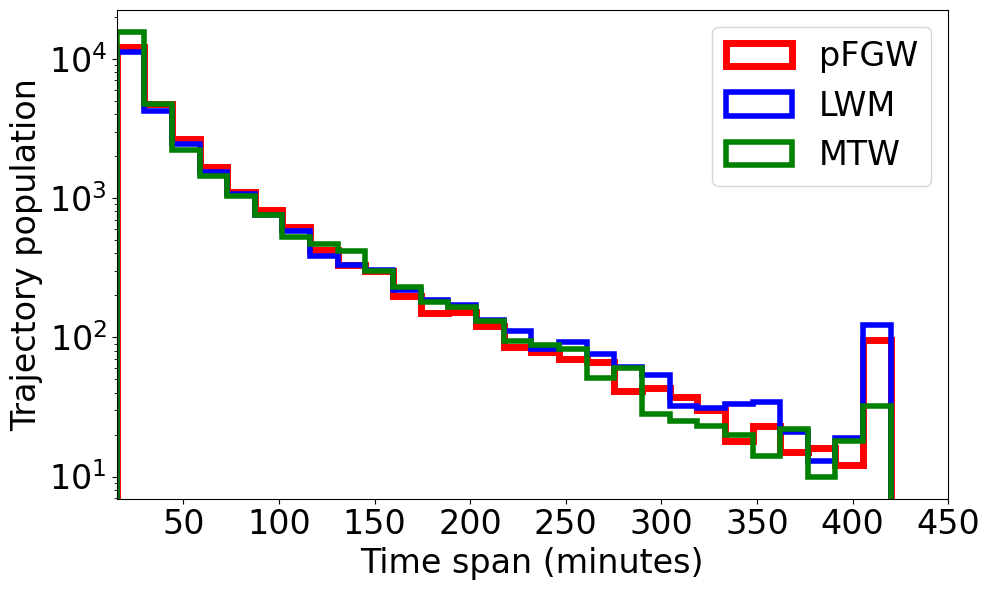

In [54]:
# Plot 1
font = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 24
}

smallfont = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 16
}

plt.figure(figsize=(10, 6))

labels_technique = {"pFGW-system": "pFGW", "LWM": "LWM", "MT-Wasserstein": "MTW"}
colors_technique = {"pFGW-system": "red", "LWM": "blue", "MT-Wasserstein": "green"}
linewidths_technique = {"pFGW-system": 5, "LWM": 4, "MT-Wasserstein": 4, }

for technique in techniques:
    all_durations = []
    for iDate in range(nDates):
        tmp_duration = track_information[technique][iDate][4]
        all_durations.extend(tmp_duration)
    durations = np.asarray(all_durations)
    
    print("# trajactories of {}:".format(technique), len(durations))
    print("# short trajactories of {}:".format(technique), len(np.where(durations < 2)[0]))
    print("# cloud systems/objects of {}:".format(technique), np.sum(durations))

for technique in techniques:
    all_durations = []
    for iDate in range(nDates):
        tmp_duration = track_information[technique][iDate][4]
        all_durations.extend(tmp_duration)
    durations = np.asarray(all_durations) * gap_size
    
    plt.hist(durations, bins=28, histtype="step", label=labels_technique[technique], 
             color=colors_technique[technique], linewidth=linewidths_technique[technique])

plt.yscale("log")
plt.xlabel("Time span (minutes)", font=font)
plt.ylabel("Trajectory population", font=font)

plt.xlim([15, 450])
plt.xticks(font=font)
plt.yticks(font=font)

plt.legend(prop=font)

plt.tight_layout()

plt.show()

### Plot 4. Bar plot for the evaluation statistics

* the median of trajectory durations 

* the mean of standard deviation of trajectory properties on tracks with duration > median
  - property 1. mean of cloud COD
  - property 2. standard deviation of cloud COD
  
* the root-mean-square error (RMSE) for the centroid locations of cloud systems on trajectories with duration > median

In [48]:
# statistical evaluation
# labels = ["pFGW-system", "pFGW-object", "PyFLEXTRKR", "tobac"]
# labels = ["pFGW"] 
labels = techniques

In [56]:
font = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 30
}

smallfont = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 24
}

tinyfont = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 20
}

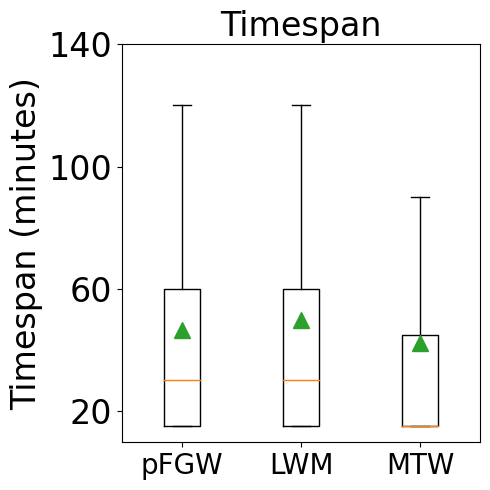

In [57]:
# Plot 4.1: median of trajectory durations
timespan_list = []

for label in labels:
    all_durations = []
    for iDate in range(nDates):
        tmp_duration = track_information[label][iDate][4]
        all_durations.extend(tmp_duration)
    durations = np.asarray(all_durations) * gap_size
    # durations = np.asarray(track_information[label][4]) * gap_size
    timespan_list.append(durations)
    
plt.figure(figsize=(5, 5))
# plt.subplot(121)
# plt.violinplot(timespan_list, showmeans=False, showmedians=False)
# plt.xticks(range(1, len(labels)+1), labels, font=smallfont)
# plt.yticks(font=smallfont)
# # plt.title("West of Africa")
# # plt.xlabel("Strategy")
# plt.ylabel("Time span (minutes)", font=smallfont)

# plt.subplot(122)
plt.boxplot(timespan_list, showmeans=True, showfliers=False, meanprops={"markersize": 12})
plt.xticks(range(1, len(labels)+1), [labels_technique[each] for each in labels], font=tinyfont, rotation=0)

yticks_pos, yticks_labels = plt.yticks(font=smallfont)
yticks_pos = yticks_pos[1::2]
plt.yticks(yticks_pos, [str(int(each)) for each in yticks_pos], font=smallfont)

plt.title("Timespan", font=smallfont)
# plt.title("West of Africa")
# plt.xlabel("Strategy")
plt.ylabel("Timespan (minutes)", font=smallfont)
plt.tight_layout()
plt.show()


medians = {labels[i]: np.median(timespan_list[i]) / gap_size for i in range(len(labels))}
# plt.subplot(122)
# plt.bar(labels, medians)
# plt.show()

In [19]:
# Plot 4.2: the mean STD of cloud system/object property

def get_trajectory_properties(clustered_sfs, cloud_id_mapping, value_list, median, measure="mean", debug=False):
    std_track_properties = []
    track_ids = np.unique(list(cloud_id_mapping.values()))
    track_instances = {}
    for key in cloud_id_mapping:
        time_step, seg_id = key
        val = cloud_id_mapping[key]
        if val not in track_instances:
            track_instances[val] = [(time_step, seg_id)]
        else:
            track_instances[val].append((time_step, seg_id))
    
    for track_id in track_instances:
        regions = track_instances[track_id]
        regions.sort()
        
        if len(regions) <= median:
            continue
        
        track_property = []
        for time_step, seg_id in regions:
            segmentation = clustered_sfs[time_step]
            values = value_list[time_step]
            assert segmentation.shape == values.shape
            
            seg_values = values[segmentation == seg_id]
            if len(seg_values) == 0:
                print(seg_id, np.unique(segmentation))
            if measure == "mean":
                prop = np.mean(seg_values)
            elif measure == "std":
                prop = np.std(seg_values)
            else:
                raise NotImplementedError
            track_property.append(prop)
        
        std_track_property = np.std(track_property)
        std_track_properties.append(std_track_property)
    
    return track_instances, std_track_properties

In [20]:
import readMergeTree as rmt
# Additional step: load scalar fields
dataset_base = "CPPin20230801_0percent"

region_lists = []
value_lists = []

for date in dates:
    dataset = dataset_base.replace("20230801", date)
    dataset_path = os.path.join("data", dataset)
    
    region_list = []
    value_list = []
    for froot, di, files in os.walk(dataset_path):
        def key(s):
            try:
                int(s)
                return int(s)
            except ValueError:
                return len(files) + 1

        def isSegmentation(s: str):
            return "segmentation" in s

        def endsWithTxt(s: str):
            return s.endswith("txt")

        def endsWithNpy(s: str):
            return s.endswith("npy")

        txt_files = list(filter(endsWithTxt, files))
        txt_files.sort(key=lambda x: key(x.split(".")[0].split("_")[-1]))

        for file in txt_files:
            regions, values = rmt.get_regions(os.path.join(dataset_path, file))
            region_list.extend(regions)
            value_list.extend(values)

    assert (len(region_list) == len(value_list))
    
    region_lists.append(region_list)
    value_lists.append(value_list)

In [21]:
for each in medians:
    if medians[each] < 2:
        medians[each] = 2.0

print(medians)

{'pFGW-system': 2.0, 'LWM': 2.0, 'MT-Wasserstein': 2.0}


In [22]:
# Step 1: we collect the trajectory information
measure = "mean"
track_instances_technique = {}
std_track_properties_technique = {}
for technique in techniques:
    for iDate in range(nDates):
        print("technique, date:", technique, dates[iDate])
        clustered_sfs, centroids, mapping_scores, cloud_id_mapping, durations = track_information[technique][iDate][:5]

        # value_list has the original scalar field
        value_list = value_lists[iDate]
        print(len(value_list), len(clustered_sfs))
        assert len(value_list) == len(clustered_sfs)
        track_instances, std_track_properties = get_trajectory_properties(clustered_sfs, cloud_id_mapping, value_list, medians[technique], measure, debug=technique=="tobac")
        track_instances_technique[(technique, iDate)] = track_instances
        std_track_properties_technique[(technique, iDate)] = std_track_properties

technique, date: pFGW-system 20230801
28 28
technique, date: pFGW-system 20230802
28 28
technique, date: pFGW-system 20230803
28 28
technique, date: pFGW-system 20230804
28 28
technique, date: pFGW-system 20230805
28 28
technique, date: pFGW-system 20230806
28 28
technique, date: pFGW-system 20230807
28 28
technique, date: pFGW-system 20230808
28 28
technique, date: LWM 20230801
28 28
technique, date: LWM 20230802
28 28
technique, date: LWM 20230803
28 28
technique, date: LWM 20230804
28 28
technique, date: LWM 20230805
28 28
technique, date: LWM 20230806
28 28
technique, date: LWM 20230807
28 28
technique, date: LWM 20230808
28 28
technique, date: MT-Wasserstein 20230801
28 28
technique, date: MT-Wasserstein 20230802
28 28
technique, date: MT-Wasserstein 20230803
28 28
technique, date: MT-Wasserstein 20230804
28 28
technique, date: MT-Wasserstein 20230805
28 28
technique, date: MT-Wasserstein 20230806
28 28
technique, date: MT-Wasserstein 20230807
28 28
technique, date: MT-Wasserstein

In [23]:
# print(list(std_track_properties_technique.keys()))

In [24]:
# plt.figure(figsize=(3, 4))

# mean_std_track_trajectories_list = []# np.mean(std_track_properties_technique[(labels[i], j)]) for i in range(len(labels)) for j in range(nDates)]
# for label in labels:
#     std_track_properties = []
#     for iDate in range(nDates):
#         std_track_properties.extend(std_track_properties_technique[(label, iDate)])
#     print(std_track_properties)
#     mean_std_track_trajectories_list.append(np.asarray(std_track_properties))

# plt.bar(labels, mean_std_track_trajectories_list)
# # plt.title("West of Africa")
# plt.xlabel("Strategy")
# plt.ylabel("Mean of STD of COD{}".format(measure[0]))

# trajectories: 9182
# trajectories: 8870
# trajectories: 8418
mean: 0.7103720574008754
median: 0.535485543548885
mean: 0.7390298821778682
median: 0.5554877995736465
mean: 0.8123039768544607
median: 0.6701739101727345


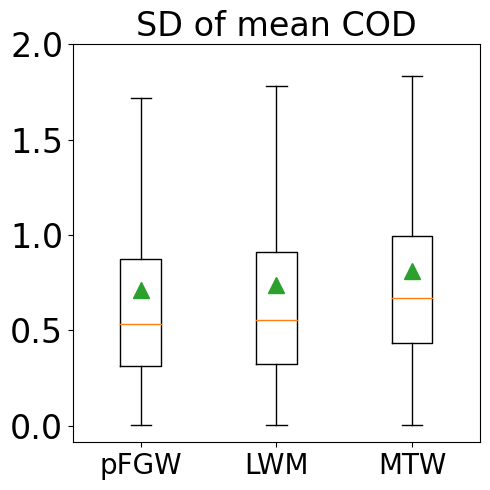

In [58]:
smallfont = {
    "family": "sans-serif",
    "weight": "normal",
    "size": 24
}


std_track_trajectories_list = []
for label in labels:
    std_track_properties = []
    for iDate in range(nDates):
        std_track_properties.extend(std_track_properties_technique[(label, iDate)])
    print("# trajectories:", len(std_track_properties))
    std_track_trajectories_list.append(np.asarray(std_track_properties))
    
plt.figure(figsize=(5, 5))
# plt.subplot(121)
# plt.violinplot(std_track_trajectories_list, showmeans=False, showmedians=False)
# plt.xticks(range(1, len(labels)+1), labels, font=smallfont)
# plt.yticks(font=smallfont)
# # plt.title("West of Africa")
# # plt.xlabel("Strategy")
# plt.ylabel("Std Dev. of COD{}".format(measure[0]), font=smallfont)

# plt.subplot(122)
plt.boxplot(std_track_trajectories_list, showmeans=True, showfliers=False, meanprops={"markersize": 12})
plt.xticks(range(1, len(labels)+1), [labels_technique[each] for each in labels], font=tinyfont, rotation=0)

yticks_pos, yticks_labels = plt.yticks(font=smallfont)
yticks_pos = yticks_pos[1::2]
plt.yticks(yticks_pos, [str(each) for each in yticks_pos], font=smallfont)

plt.title("SD of {} COD".format(measure), font=smallfont)
plt.tight_layout()

# plt.title("West of Africa")
# plt.xlabel("Strategy")
# plt.ylabel("Std Dev. of COD{}".format(measure[0]), font=smallfont)

for ss in std_track_trajectories_list:
    print("mean:", np.mean(ss))
    print("median:", np.median(ss))

In [26]:
def get_trajectory_line_fit(track_instances, centroids, median):
    root_mses = []
    
    for track_id in track_instances:
        regions = track_instances[track_id]
        regions.sort()
        
        if len(regions) <= median:
            continue
        
        xs = []
        ys = []
        for time_step, seg_id in regions:
            segmentation = clustered_sfs[time_step]
            values = value_list[time_step]
            assert segmentation.shape == values.shape
            
            xs.append(time_step)
            ys.append(centroids[time_step][seg_id])
        
        p, residuals, rank, singular_values, rcond = np.polyfit(xs, ys, 1, full=True)
        root_mses.append(np.sum(np.sqrt(residuals)))
        
    return root_mses

In [27]:
std_track_linefit_technique = {}
for technique in techniques:
    for iDate in range(nDates):
        date = dates[iDate]
        print("technique:", technique)
        clustered_sfs, centroids, mapping_scores, cloud_id_mapping, durations = track_information[technique][iDate][:5]
        track_instances = track_instances_technique[(technique, iDate)]

        value_list = value_lists[iDate]
        # value_list has the original scalar field
        assert len(value_list) == len(clustered_sfs)
        root_mses = get_trajectory_line_fit(track_instances, centroids, medians[technique])
        std_track_linefit_technique[(technique, iDate)] = root_mses

technique: pFGW-system
technique: pFGW-system
technique: pFGW-system
technique: pFGW-system
technique: pFGW-system
technique: pFGW-system
technique: pFGW-system
technique: pFGW-system
technique: LWM
technique: LWM
technique: LWM
technique: LWM
technique: LWM
technique: LWM
technique: LWM
technique: LWM
technique: MT-Wasserstein
technique: MT-Wasserstein
technique: MT-Wasserstein
technique: MT-Wasserstein
technique: MT-Wasserstein
technique: MT-Wasserstein
technique: MT-Wasserstein
technique: MT-Wasserstein


mean: 5.892816259214663
median: 2.4595070373792476
mean: 6.994346944131821
median: 3.015658923576147
mean: 696.8771115670203
median: 607.3179402031817


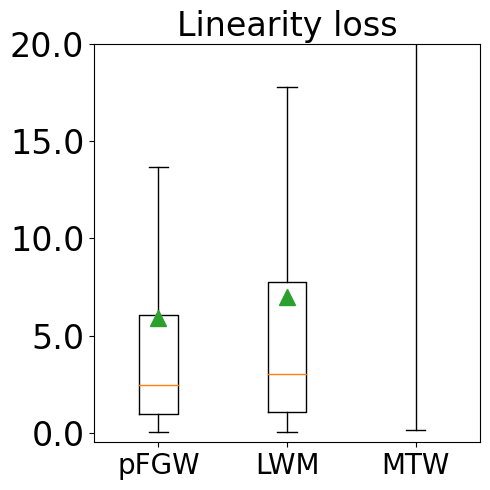

In [59]:
std_track_linefit_list = []
for label in labels:
    std_track_linefits = []
    for iDate in range(nDates):
        std_track_linefits.extend(std_track_linefit_technique[(label, iDate)])
    std_track_linefit_list.append(np.asarray(std_track_linefits))

plt.figure(figsize=(5, 5))

# plt.subplot(121)
# plt.violinplot(std_track_linefit_list, showmeans=False, showmedians=False)
# plt.xticks(range(1, len(labels)+1), labels, font=smallfont)
# plt.yticks(font=smallfont)
# # plt.title("West of Africa")
# # plt.xlabel("Strategy")
# plt.ylabel("Linearity error", font=smallfont)

# plt.subplot(122)

plt.boxplot(std_track_linefit_list, labels=labels, showmeans=True, showfliers=False, meanprops={"markersize": 12})
plt.xticks(range(1, len(labels)+1), [labels_technique[each] for each in labels], font=tinyfont, rotation=0)


# plt.yscale("log")
plt.ylim([-0.5, 20])
yticks_pos, yticks_labels = plt.yticks(font=smallfont)
yticks_pos = yticks_pos[1::2]
plt.yticks(yticks_pos, [str(each) for each in yticks_pos], font=smallfont)
plt.title("Linearity loss", font=smallfont)
plt.tight_layout()
# # plt.xlabel("Strategy")
# plt.ylabel("Linearity error", font=smallfont)

for ss in std_track_linefit_list:
    print("mean:", np.mean(ss))
    print("median:", np.median(ss))

In [29]:
def l2_dist(a, b):
    return np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def get_trajectory_avg_speed(track_instances, centroids, median):
    speeds_record = {}
    
    for track_id in track_instances:
        regions = track_instances[track_id]
        regions.sort()
        
        if len(regions) <= median:
            continue
        
        xs = []
        ys = []
        for time_step, seg_id in regions:
            segmentation = clustered_sfs[time_step]
            values = value_list[time_step]
            assert segmentation.shape == values.shape
            
            xs.append(time_step)
            ys.append(centroids[time_step][seg_id])
        
        for i in range(len(xs) - 1):
            x, y = xs[i], ys[i]
            next_x, next_y = xs[i+1], ys[i+1]
            if x not in speeds_record:
                speeds_record[x] = [l2_dist(y, next_y)]
            else:
                speeds_record[x].append(l2_dist(y, next_y))
#         p, residuals, rank, singular_values, rcond = np.polyfit(xs, ys, 1, full=True)
#         root_mses.append(np.sum(np.sqrt(residuals)))

    speeds = {}
    for each_x in speeds_record:
        speeds[each_x] = np.mean(speeds_record[each_x])
        
    return speeds

technique: pFGW-system
technique: LWM
technique: MT-Wasserstein


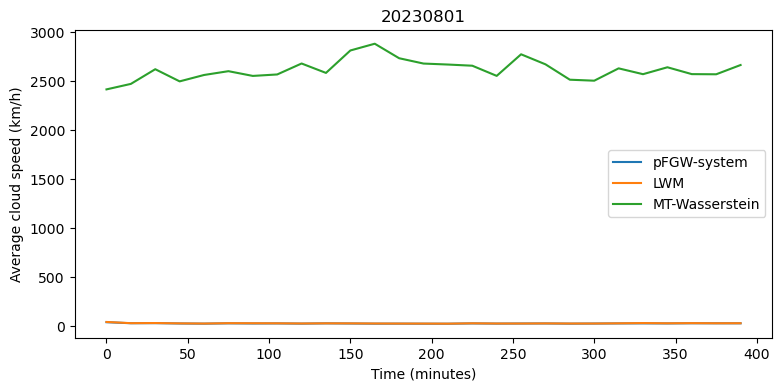

technique: pFGW-system
technique: LWM
technique: MT-Wasserstein


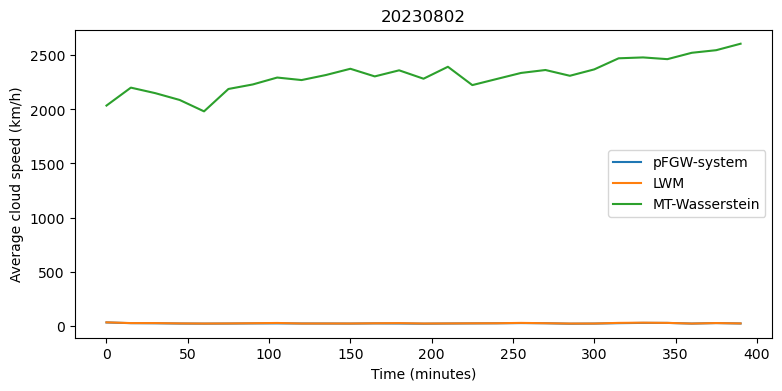

technique: pFGW-system
technique: LWM
technique: MT-Wasserstein


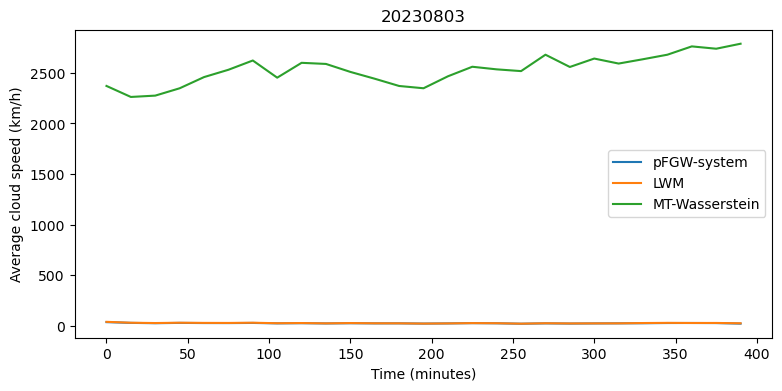

technique: pFGW-system
technique: LWM
technique: MT-Wasserstein


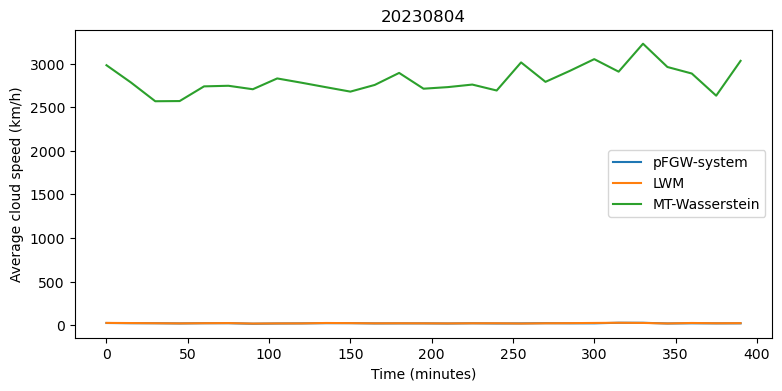

technique: pFGW-system
technique: LWM
technique: MT-Wasserstein


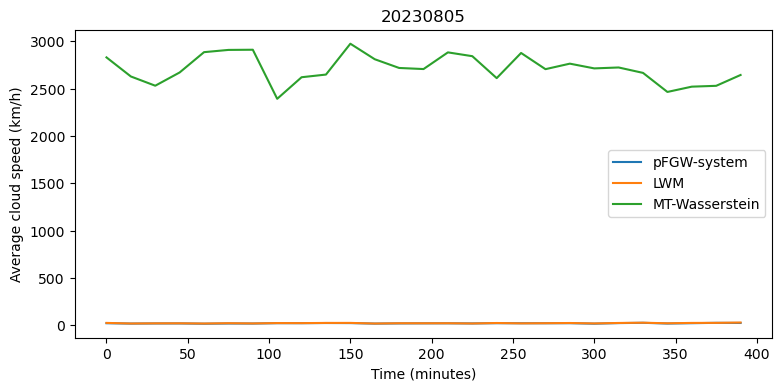

technique: pFGW-system
technique: LWM
technique: MT-Wasserstein


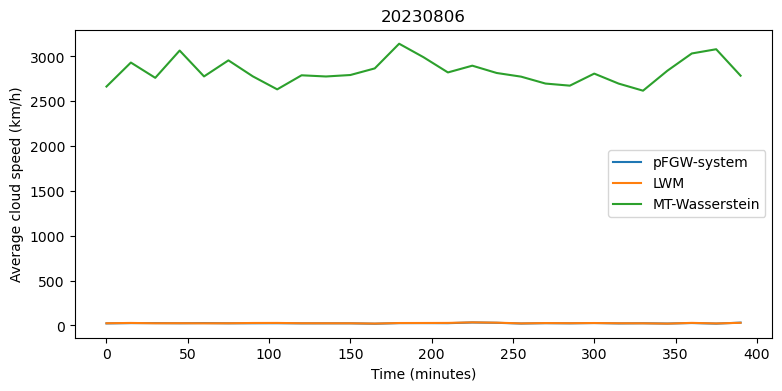

technique: pFGW-system
technique: LWM
technique: MT-Wasserstein


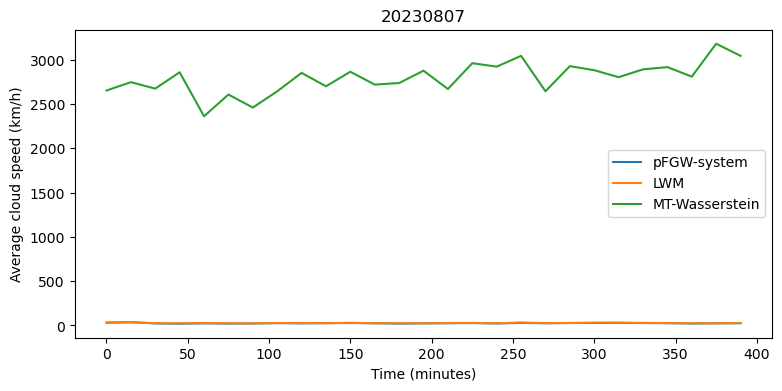

technique: pFGW-system
technique: LWM
technique: MT-Wasserstein


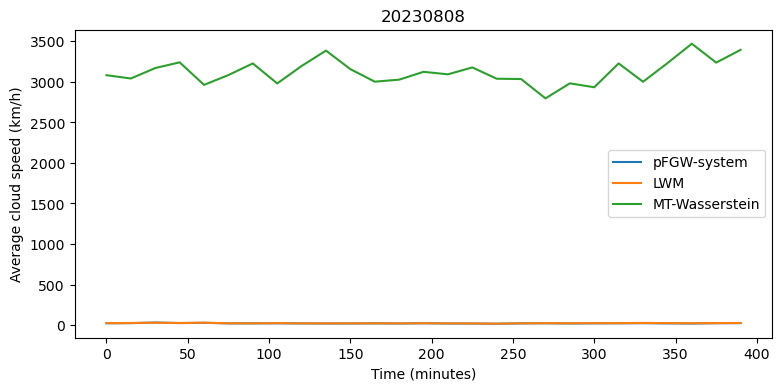

In [30]:
for iDate in range(nDates):
    plt.figure(figsize=(9, 4))
    for label in labels:
        date = dates[iDate]
        print("technique:", label)
        clustered_sfs, centroids, mapping_scores, cloud_id_mapping, durations = track_information[label][iDate]
        track_instances = track_instances_technique[(label, iDate)]

        value_list = value_lists[iDate]
        # value_list has the original scalar field
        assert len(value_list) == len(clustered_sfs)
        speeds = get_trajectory_avg_speed(track_instances, centroids, medians[label])
        
        xs = [each * gap_size for each in speeds.keys()]
        ys = [each * 2 * 4 for each in speeds.values()]
        
        plt.plot(xs, ys, label=label)
        
    plt.xlabel("Time (minutes)")
    plt.ylabel("Average cloud speed (km/h)")
    plt.title(date)
    plt.legend()
    plt.show()

### Section 3. Appendix plots for parameter justification

In [31]:
# # plot: max matched distance
# dist_table_path = "./binary-parameter-tuning/CPPin20230801_0percent"

# filename = "m_tuning_stats_alpha_0.2.csv"

# import pandas as pd
# dist_table = pd.read_csv(pjoin(dist_table_path, filename)).to_dict()

In [32]:
# dist_ms = dist_table['m']
# dist_mmds = dist_table["max_matched_distance"]

# def parse_list_str(st):
#     st = st.replace("[", "").replace("]", "").strip()
#     items = st.split(",")
#     lst = []
#     for item in items:
#         lst.append(float(item))
#     return lst

# lst_ms = []
# lst_mmds = []
# for key in dist_ms:
#     tmp_ms = parse_list_str(dist_ms[key])
#     tmp_mmds = parse_list_str(dist_mmds[key])
#     combined = list(zip(tmp_ms, tmp_mmds))
#     combined.sort()
#     ms = [i for i, j in combined]
#     mmds = [j for i, j in combined]
#     lst_ms.append(ms)
#     lst_mmds.append(mmds)

In [33]:
# plt.figure(figsize=(16, 8))
# for i in range(len(lst_ms)):
#     ms = lst_ms[i]
#     mmds = lst_mmds[i]
    
#     plt.plot(ms, mmds, label=str(i))
# plt.show()